# Introduction
In this study we wish to show that the semi-analytical model HOPE (Lee et. al., 1999) is suitable to for modelling complex water 

#AIM

Confirm that forward modelling of HOPE parameters agree with Planarrad forward modelling parameters

## Method

The sub-surface remote sensing reflectance was first modelled using Planarrad for a varing few water types.

###Viewing geometry

Sun zenith angle (SZA) 45.28 deg  
Sun azimuth (SAA) 262.39 deg  

###IOPs

The following IOPs were considered and modelled as outlined below

#### Absorption
Absorption due to pure water - $a_{water}(\lambda)$ - Smith & Baker (date)    
Absoprtion due to disolved organic matter - $a_{cdom}(\lambda) - G \exp^{(-S(\lambda - 400))}$    
Absorption due to phytoplankton - $a_\phi(\lambda)$  
Total absorption - $a(\lambda)$ =  $a_{water}(\lambda) + a_{cdom}(\lambda) + a_{\phi}(\lambda)$

#### Back-scattering
Back-scattering due to particles - $b_{bp} = X(\frac{550}{\lambda})^Y$

#### Scattering
Scattering due to pure water - $b_{water}$ - Pope & Fry (date)  
Scattering due to particles - $b_p = \frac{b_{bp}}{{0.02}}$  
Total scattering - $b = b_{water} + b_p$

#### Attenuation
c = a + b

#### Where:

H is depth in meters    
P is phytoplankton scaling parameter $P\times a_\phi$  
G, S are the CDOM scaling parameters $G \exp^{(-S(\lambda - 400))}$  
X, Y are the Particle scaling parameters $X(\frac{550}{\lambda})^Y$  

#### Planarrad requires b & c

$a = a_{water} + a_{cdom} + a_\phi$  
$b_b = b_{bp}$  
$b = \frac{b_bp}{0.02} + b_{water}$  
$c = a + b$

## Run Parameters
The IOPs were varied by making all combinations of IOPs using the following parameter

H = 1, 15, 50  
P = 0.01, 0.05, 0.1  
G = 0.01, 0.05, 0.1  
X = 0.001, 0.01  
Y = 1.0  
S = 0.015  






## The following batch file was created

In [ ]:
# %load /home/marrabld/Projects/hope_test_planarradpy/inputs/batch_files/hope_test_batch.txt
#----------------------------------------#
# Give the batch run a name
#----------------------------------------#
batch_name = hope_test

#----------------------------------------#
# Set the Bio-optical parameters list 
#----------------------------------------#
saa_list = 262.39
sza_list = 45.28
p_list = 0.01, 0.05, 0.1
x_list = 0.001, 0.01
y_list = 1.0
g_list = 0.01, 0.05, 0.1
s_list = 0.015
z_list = 1, 15, 50

#----------------------------------------#
# Wavelengths must be defined
# All IOPs are interpolated to these 
# Wavelengths
#----------------------------------------#
wavelengths = 410.0, 430.0, 450.0, 470.0, 490.0, 510.0, 530.0, 550.0, 570.0, 590.0, 610.0, 630.0, 650.0, 670.0, 690.0, 710.0, 730.0

#----------------------------------------#
# Choose the number of CPUs
# -1 means query the number of CPUs
#----------------------------------------#
num_cpus = 2

#----------------------------------------#
# Set the path of Planarrad
#----------------------------------------#
exec_path = /home/marrabld/Apps/jude2_install/bin

#----------------------------------------#
# Set the logging level
#----------------------------------------#
verbose = 1

#----------------------------------------#
# Set the file paths
# Use absolute paths
#----------------------------------------#
phytoplankton_absorption_file = /home/marrabld/Projects/hope_test_planarradpy/inputs/iop_files/a_phi.csv
bottom_reflectance_file = /home/marrabld/Projects/hope_test_planarradpy/inputs/bottom_files/Refl_BenthicMixture_1_17Bands.txt

#--------------------------------------------------#
# Set the parameter to report
#--------------------------------------------------#
#report_parameter = Rrs

report_parameter = rrs


## Inputs
###Phytoplankton Absoprtion

Populating the interactive namespace from numpy and matplotlib


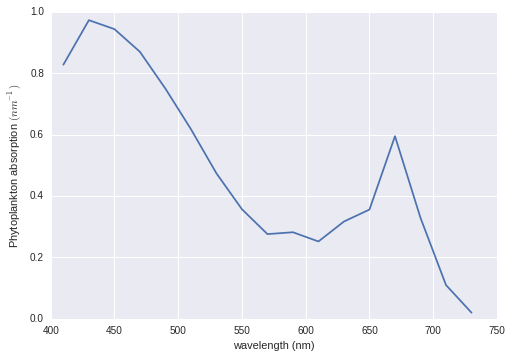

In [1]:
%pylab inline
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np

a_phi = np.genfromtxt('/home/marrabld/Projects/hope_test_planarradpy/inputs/iop_files/a_phi.csv', delimiter=',');
wavelength = a_phi[0,:]
plot(wavelength,a_phi[1,:]);
xlabel('wavelength (nm)');
ylabel('Phytoplankton absorption $(nm^{-1})$');

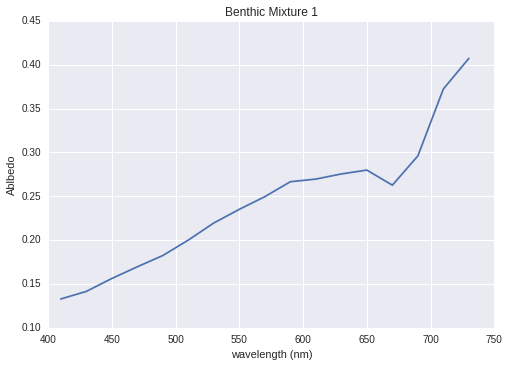

In [2]:
benth = np.genfromtxt('/home/marrabld/Projects/hope_test_planarradpy/inputs/bottom_files/Refl_BenthicMixture_1_17Bands.txt', delimiter=',');

plot(wavelength,benth[:]);
xlabel('wavelength (nm)');
ylabel('Ablbedo');
title('Benthic Mixture 1');

Now we plot the $R_rs$ from Plannarrad

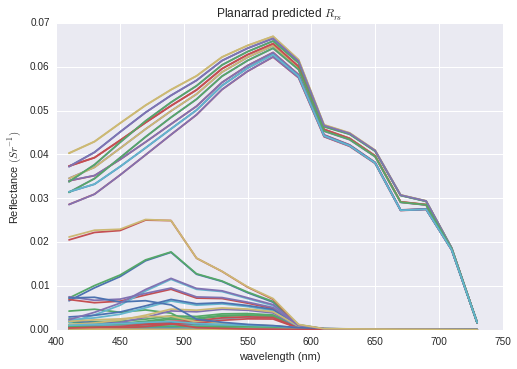

In [3]:
planar_refl = np.genfromtxt('/home/marrabld/Projects/hope_test_planarradpy/outputs/hope_test/batch_report.csv', delimiter=',', skip_header=1);
for row in planar_refl:
    plot(wavelength, row[9:]);
    
ylabel('Reflectance $(Sr^{-1})$');
xlabel('wavelength (nm)');
title(r'Planarrad predicted $R_{rs}$');